In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans


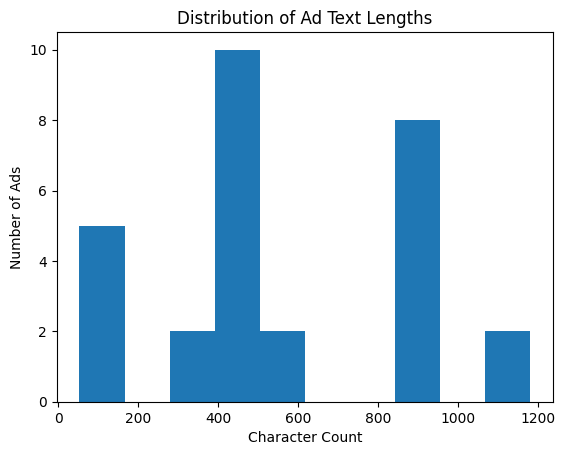

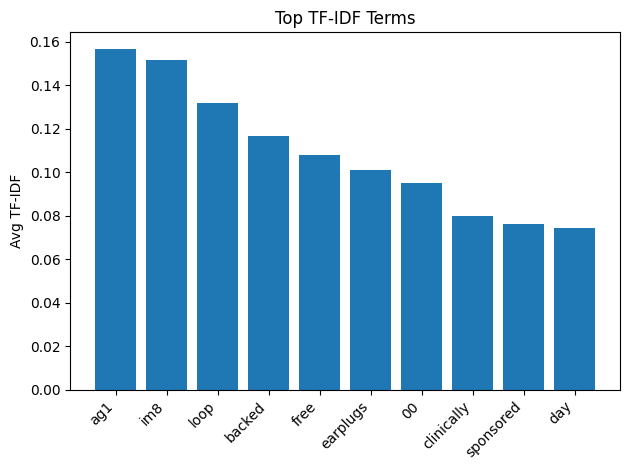

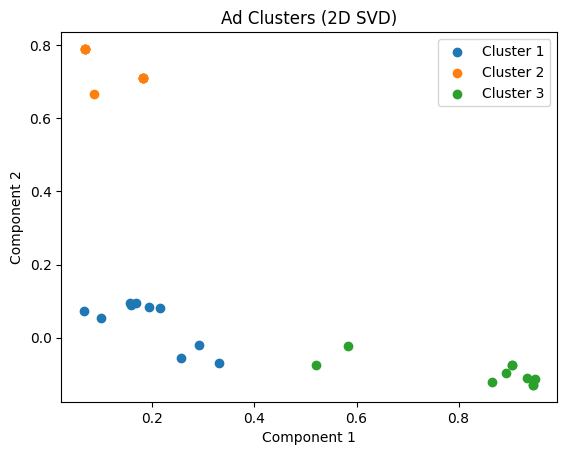

In [ ]:
# 1. Load the JSON
json_path = 'ad_data/top_performing_ads_20250717_180056.json'
with open(json_path, 'r') as f:
    ads = json.load(f)

# 2. Build a DataFrame of key fields
df = pd.DataFrame([{
    'index': ad['index'],
    'text': ad['text_content'],
    'media_count': len(ad['media_urls']),
    'score': ad['performance_score']
} for ad in ads])

# 3. Text‑length distribution
df['text_length'] = df['text'].str.len()
plt.figure()
plt.hist(df['text_length'], bins=10)
plt.title('Distribution of Ad Text Lengths')
plt.xlabel('Character Count')
plt.ylabel('Number of Ads')
plt.show()

# 4. Top TF‑IDF terms
vectorizer = TfidfVectorizer(stop_words='english', max_features=50)
tfidf = vectorizer.fit_transform(df['text'])
terms = vectorizer.get_feature_names_out()
avg_scores = tfidf.mean(axis=0).A1

# Plot the top 10 terms
top_n = 10
idxs = avg_scores.argsort()[::-1][:top_n]
plt.figure()
plt.bar(range(top_n), avg_scores[idxs])
plt.xticks(range(top_n), terms[idxs], rotation=45, ha='right')
plt.title('Top TF‑IDF Terms')
plt.ylabel('Avg TF‑IDF')
plt.tight_layout()
plt.show()

# 5. 2D embedding + clustering
svd = TruncatedSVD(n_components=2, random_state=42)
coords = svd.fit_transform(tfidf)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(coords)

plt.figure()
for c in range(3):
    plt.scatter(coords[clusters==c,0], coords[clusters==c,1], label=f'Cluster {c+1}')
plt.title('Ad Clusters (2D SVD)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()
